In [1]:
#!apt -q install libomp-dev
# !pip -q install faiss-gpu
# !pip -q install faiss-cpu
# !pip -q install phik

In [2]:
import os
import faiss
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.preprocessing import QuantileTransformer, StandardScaler

In [3]:
df_path = 'data/match/'

In [4]:
if os.path.exists(df_path):
    df_base = pd.read_csv(df_path+'base.csv', index_col=0)
    df_train = pd.read_csv(df_path+'train.csv', index_col=0)
    df_validation = pd.read_csv(df_path+'validation.csv', index_col=0)
    df_validation_answer = pd.read_csv(df_path+'validation_answer.csv', index_col=0)
else:
    print('Something is wrong')

In [5]:
def primary_information(df):
    """Вывод общей информации о датасете"""
    print(f"Размерность: {df.shape}")
    display(df.info())
    display(df.head())

In [6]:
def pass_value_barh(df):
    """Вывод графика с количеством пропущенных значений"""
    try:
        ax = (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
        )
        ax.set_xlabel("Пропущенные значения, %", fontsize = 16, color = 'SteelBlue')
        ax.set_ylabel("Поле", fontsize = 16, color = 'SteelBlue')
        ax.set_title('Процент пропущенных значений' + "\n", fontsize = 22, color = 'SteelBlue')
    except:
        print('Пропусков нет')

In [7]:
print(f"Датесет df_base")
primary_information(df_base)
print(f"Датесет df_train")
primary_information(df_train)
print(f"Датесет df_validation")
primary_information(df_validation)
print(f"Датесет df_validation_answer")
primary_information(df_validation_answer)

Датесет df_base
Размерность: (291813, 72)
<class 'pandas.core.frame.DataFrame'>
Index: 291813 entries, 4207931-base to 274130-base
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       291813 non-null  float64
 1   1       291813 non-null  float64
 2   2       291813 non-null  float64
 3   3       291813 non-null  float64
 4   4       291813 non-null  float64
 5   5       291813 non-null  float64
 6   6       291813 non-null  float64
 7   7       291813 non-null  float64
 8   8       291813 non-null  float64
 9   9       291813 non-null  float64
 10  10      291813 non-null  float64
 11  11      291813 non-null  float64
 12  12      291813 non-null  float64
 13  13      291813 non-null  float64
 14  14      291813 non-null  float64
 15  15      291813 non-null  float64
 16  16      291813 non-null  float64
 17  17      291813 non-null  float64
 18  18      291813 non-null  float64
 19  19      291813 non-null  float64


None

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,
4207931-base,-43.946243,15.364378,17.515854,-132.31146,157.064420,-4.069252,-340.630860,-57.550140,128.398220,45.090958,...,-71.927170,30.711966,-90.190475,-24.931271,66.972534,106.346634,-44.270622,155.98834,-1074.464888,-25.066608
2710972-base,-73.004890,4.923342,-19.750746,-136.52908,99.907170,-70.709110,-567.401996,-128.890150,109.914986,201.472200,...,-109.044660,20.916021,-171.201390,-110.596844,67.730100,8.909615,-9.470253,133.29536,-545.897014,-72.913230
1371460-base,-85.565570,-0.493598,-48.374817,-157.98502,96.809510,-81.710210,-22.297688,79.768670,124.357086,105.715180,...,-58.821650,41.369606,-132.934500,-43.016839,67.871925,141.778240,69.048520,111.72038,-1111.038833,-23.087206
3438601-base,-105.564090,15.393871,-46.223934,-158.11488,79.514114,-48.944480,-93.713010,38.581398,123.397960,110.324326,...,-87.907290,-58.806870,-147.794800,-155.830237,68.974754,21.397510,126.098785,139.73320,-1282.707248,-74.527940
422798-base,-74.638880,11.315012,-40.204174,-161.76430,50.507114,-80.775560,-640.923467,65.225000,122.344940,191.465850,...,-30.002094,53.642930,-149.823230,176.921371,69.473280,-43.395180,-58.947716,133.84064,-1074.464888,-1.164146


Датесет df_train
Размерность: (9999, 73)
<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 109249-query to 13504-query
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9999 non-null   float64
 1   1       9999 non-null   float64
 2   2       9999 non-null   float64
 3   3       9999 non-null   float64
 4   4       9999 non-null   float64
 5   5       9999 non-null   float64
 6   6       9999 non-null   float64
 7   7       9999 non-null   float64
 8   8       9999 non-null   float64
 9   9       9999 non-null   float64
 10  10      9999 non-null   float64
 11  11      9999 non-null   float64
 12  12      9999 non-null   float64
 13  13      9999 non-null   float64
 14  14      9999 non-null   float64
 15  15      9999 non-null   float64
 16  16      9999 non-null   float64
 17  17      9999 non-null   float64
 18  18      9999 non-null   float64
 19  19      9999 non-null   float64
 20  20      9999 non-nul

None

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,Target
Id,,,,,,,,,,,,,,,,,,,,,
109249-query,-24.021454,3.122524,-80.947525,-112.329994,191.090180,-66.903130,-759.626065,-75.284454,120.55149,131.131700,...,-24.601670,-167.760770,133.678516,68.184600,26.317545,11.938202,148.549320,-778.563381,-46.877750,66971-base
34137-query,-82.033580,8.115866,-8.793022,-182.972100,56.645336,-52.597610,-55.720337,130.059250,129.38335,76.202880,...,54.448433,-120.894806,-12.292085,66.608116,-27.997612,10.091335,95.809265,-1022.691531,-88.564705,1433819-base
136121-query,-75.719640,-0.223386,-86.186130,-162.064060,114.320114,-53.394600,-117.261013,-24.857851,124.80780,112.190155,...,-5.609123,-93.029880,-80.997871,63.733383,11.378683,62.932007,130.975390,-1074.464888,-74.861176,290133-base
105191-query,-56.580620,5.093593,-46.943110,-149.039120,112.436430,-76.820510,-324.995645,-32.833107,119.47865,120.074790,...,21.624313,-158.880370,179.597294,69.891360,-33.804955,233.914610,122.868546,-1074.464888,-93.775375,1270048-base
63983-query,-52.725650,9.027046,-92.829650,-113.111010,134.124970,-42.423073,-759.626065,8.261169,119.49023,172.365360,...,13.807772,-208.650040,41.742014,66.522420,41.362930,162.723050,111.261310,-151.162805,-33.831450,168591-base


Датесет df_validation
Размерность: (10000, 72)
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 196680-query to 43566-query
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000

None

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,
196680-query,-59.383420,8.563436,-28.203072,-134.22534,82.73661,-150.572170,-129.178969,23.670555,125.66636,108.809586,...,-103.481630,79.564530,-120.31357,54.218155,68.50073,32.681908,84.19686,136.412960,-1074.464888,-21.233612
134615-query,-103.912150,9.742726,-15.209915,-116.37310,137.69880,-85.530075,-776.123158,44.481530,114.67121,95.231290,...,-51.193770,49.299644,-101.89454,105.560548,67.80104,13.633057,108.05138,111.864456,-841.022331,-76.567980
82675-query,-117.923280,-3.504554,-64.299390,-155.18713,156.82137,-34.082264,-537.423653,54.078613,121.97396,59.321335,...,-115.176155,48.636130,-132.17967,-0.988696,68.11125,107.065216,134.61765,134.080000,27.773269,-32.401714
162076-query,-90.880554,4.888542,-39.647797,-131.75010,62.36212,-105.593270,-347.132493,-83.351750,133.91331,201.146090,...,-112.293790,54.884007,-177.56935,-116.374997,67.88766,136.893980,124.89447,117.707750,-566.343980,-90.905556
23069-query,-66.946740,10.562773,-73.781830,-149.39787,2.93866,-51.288853,-587.189361,-2.764402,126.56105,131.900620,...,-116.440605,47.279976,-162.65400,107.409409,67.78526,-60.976490,142.68571,82.264300,-345.340457,-48.572525


Датесет df_validation_answer
Размерность: (10000, 1)
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 196680-query to 43566-query
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Expected  10000 non-null  object
dtypes: object(1)
memory usage: 156.2+ KB


None

,Expected
Id,
196680-query,1087368-base
134615-query,849674-base
82675-query,4183486-base
162076-query,2879258-base
23069-query,615229-base


In [8]:
df_base.duplicated().sum()

11278

In [9]:
df_base = df_base.drop_duplicates()

In [10]:
def draw_boxplots(df, ncols, nrows, title):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16, 32))
    i = 0
    for column in df.columns:
        if column == 'Id':
            continue
        sns.boxplot(data = df, y=column, ax=axs[i % nrows][i // nrows])
        axs[i % nrows][i // nrows].set_xlabel(column)
        axs[i % nrows][i // nrows].set_ylabel("")
        i += 1
    fig.suptitle(title, fontsize=30);

In [11]:
def draw_hists(df, ncols, nrows, title):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16, 32))
    i = 0
    for column in df.columns:
        if column == 'Id':
            continue
        df[column].hist(ax=axs[i % nrows][i // nrows])
        axs[i % nrows][i // nrows].set_xlabel(column)
        axs[i % nrows][i // nrows].set_ylabel("")
        i += 1
    fig.suptitle(title, fontsize=30);

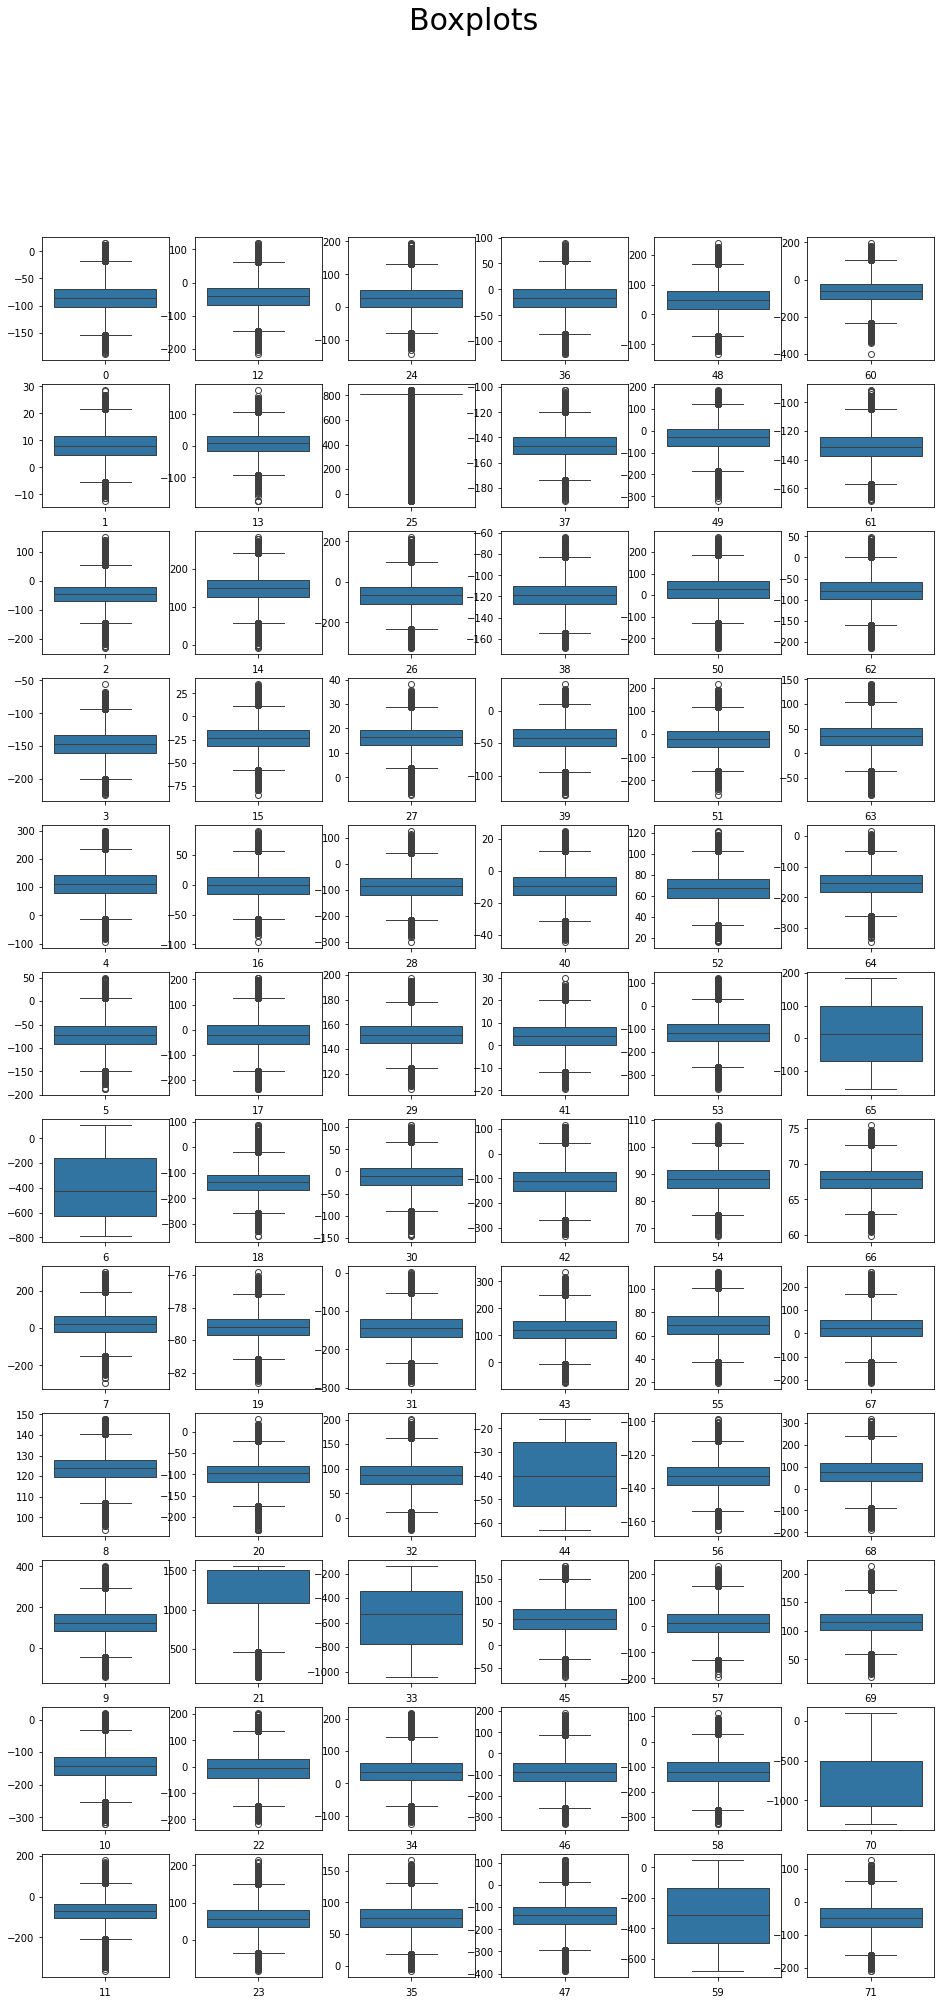

In [12]:
draw_boxplots(df_base, 6, 12, "Boxplots")

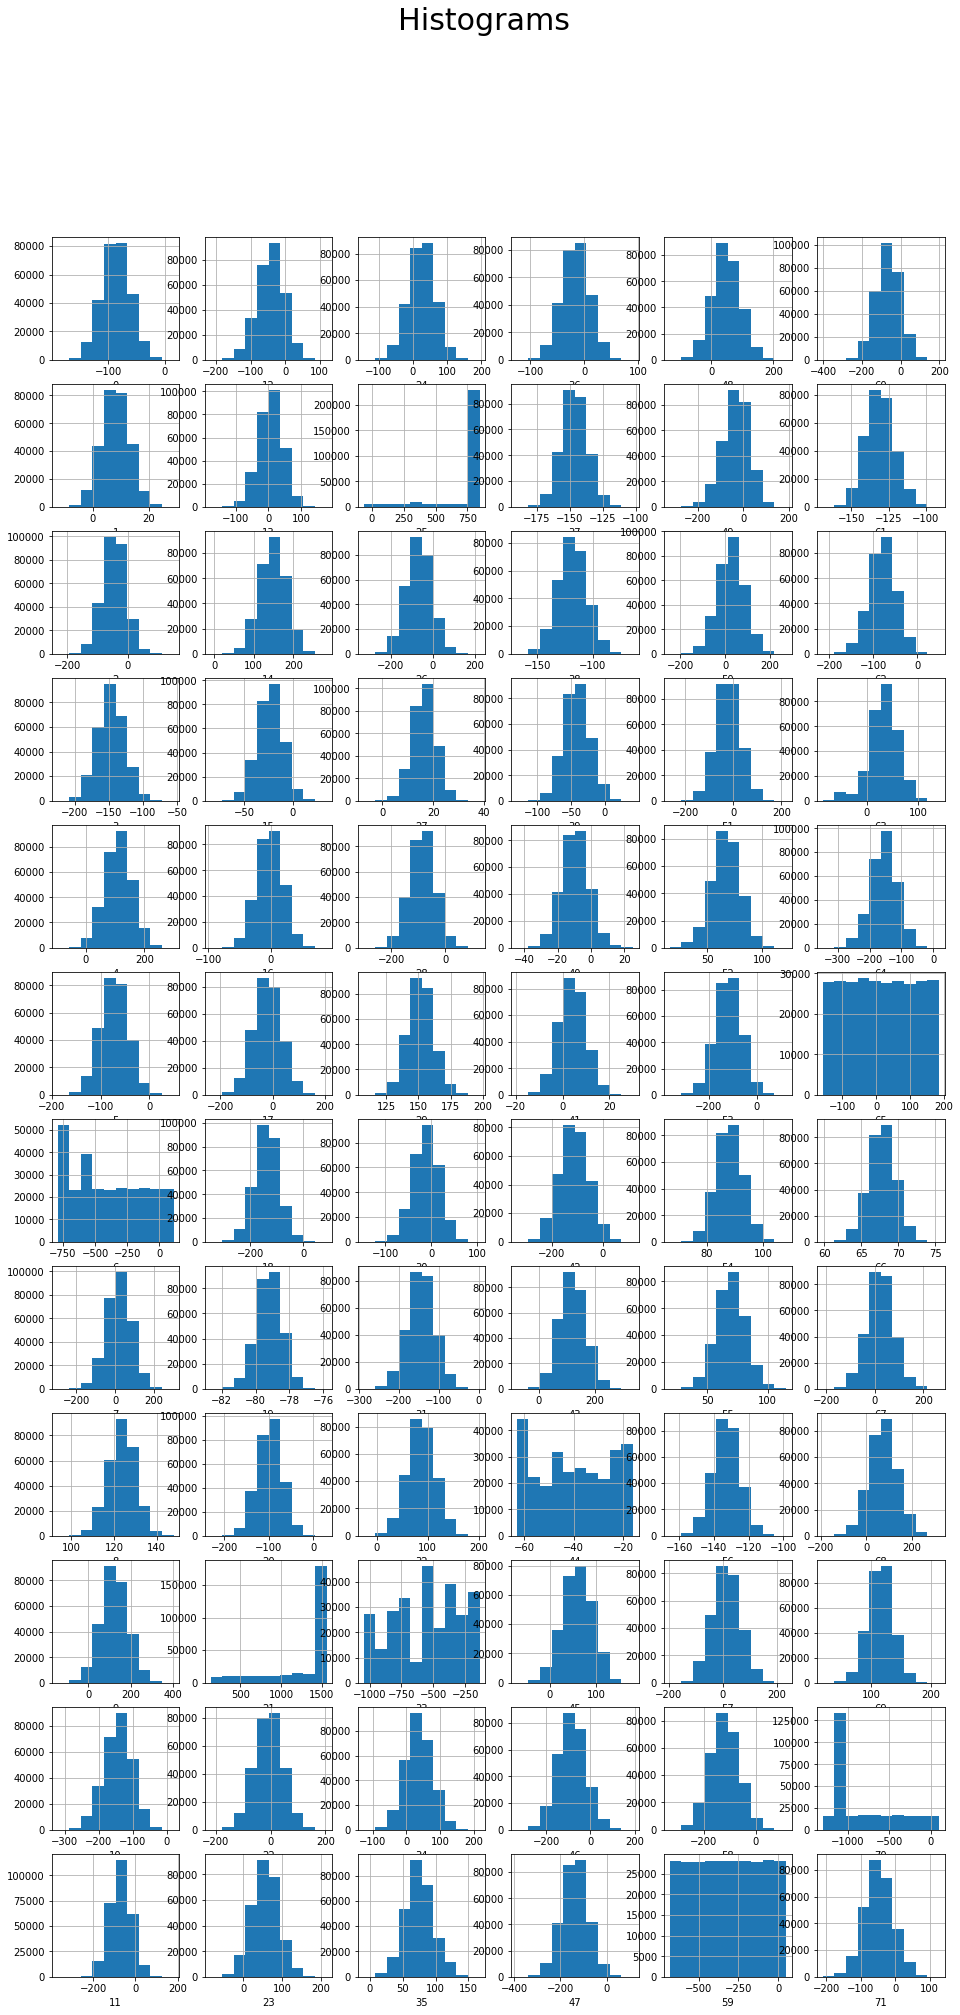

In [13]:
draw_hists(df_base, 6, 12, "Histograms")

df_base[cols].corr()

interval_cols = list(df_base.columns)
interval_cols.remove('Id')
cols = interval_cols[:16]
cols

phik_overview = df_base[cols].sample(1000).phik_matrix(
    interval_cols=cols
)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$ тренировочная выборка",
    fontsize_factor=1.5,
    figsize=(15, 12)
);

In [14]:
# Удаление колонок с выбросами
columns_to_drop = ['21', '25', '33', '44', '59', '65']
df_base = df_base.drop(columns_to_drop, axis=1)
df_train = df_train.drop(columns_to_drop, axis=1)

In [15]:
# Обучение QuantileTransformer на тренировочных данных
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_transformer.fit(df_train[['6', '70']])

QuantileTransformer(output_distribution='normal')

In [16]:
# Применение трансформации ко всем наборам данных
datasets = [df_train, df_base]
for dataset in datasets:
    dataset[['6', '70']] = quantile_transformer.transform(dataset[['6', '70']])

In [17]:
# Создание и обучение StandardScaler на тренировочных данных
scaler = StandardScaler()
train_features = df_train.drop(columns=['Target'])
base_scaled = scaler.fit_transform(df_base.values)
train_scaled = scaler.transform(train_features.values)

In [18]:
# Функция для расчета точности
def calculate_accuracy(idx, targets, base_index):
    acc = 0
    for target, el in zip(targets.values.tolist(), idx.tolist()):
        acc += int(target in [base_index[r] for r in el])
    return acc / len(idx)

In [19]:
dims = base_scaled.shape[1]
n_cells = 10
quantizer = faiss.IndexFlatL2(dims)
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells)

In [20]:
idx_l2.train(np.ascontiguousarray(base_scaled).astype('float32'))
idx_l2.add(np.ascontiguousarray(base_scaled).astype('float32'))

In [21]:
base_index = {k: v for k, v in enumerate(df_base.index.to_list())}

In [22]:
candidate_number = 5
r, idx = idx_l2.search(np.ascontiguousarray(train_scaled).astype('float32'), candidate_number)

In [25]:
accuracy_flat_l2 = calculate_accuracy(idx, df_train['Target'], base_index)
print(f"Accuracy = {accuracy_flat_l2:.1%}")

Accuracy = 69.1%


https://habr.com/ru/companies/okkamgroup/articles/509204/